In [60]:
import numpy as np
import tensorflow as tf
trainX = np.load("trainX.npy",allow_pickle='TRUE')
trainY = np.load("trainY.npy",allow_pickle='TRUE')
testX = np.load("testX.npy",allow_pickle='TRUE')
testY = np.load("testY.npy",allow_pickle='TRUE')
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
trainY = tf.keras.utils.to_categorical(trainY, num_classes=20)
testY = tf.keras.utils.to_categorical(testY, num_classes=20)

(240, 10304)
(240,)
(160, 10304)
(160,)


In [61]:
trainX = trainX.reshape(240,112,92,1)
testX = testX.reshape(160,112,92,1)

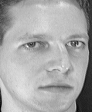

In [62]:
tf.keras.preprocessing.image.array_to_img(trainX[1])

## Build the Graph

In [63]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((112,92,1),input_shape=(112,92,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))

In [64]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(20, activation='softmax'))

In [65]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 112, 92, 1)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 92, 1)        4         
_________________________________________________________________
conv2d (Conv2D)              (None, 110, 90, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 45, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 55, 45, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 43, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 21, 64)        0

## Train the model

In [73]:
#Train the model
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=20,
          batch_size=16)

Epoch 1/20
15/15 [==============================] - 1s 22ms/step - loss: 7.9872e-05 - accuracy: 1.0000 - val_loss: 0.2339 - val_accuracy: 0.9563
Epoch 2/20
15/15 [==============================] - 0s 14ms/step - loss: 7.0060e-05 - accuracy: 1.0000 - val_loss: 0.2365 - val_accuracy: 0.9563
Epoch 3/20
15/15 [==============================] - 0s 11ms/step - loss: 7.8027e-05 - accuracy: 1.0000 - val_loss: 0.2366 - val_accuracy: 0.9563
Epoch 4/20
15/15 [==============================] - 0s 10ms/step - loss: 3.7422e-05 - accuracy: 1.0000 - val_loss: 0.2378 - val_accuracy: 0.9563
Epoch 5/20
15/15 [==============================] - 0s 13ms/step - loss: 5.3932e-05 - accuracy: 1.0000 - val_loss: 0.2385 - val_accuracy: 0.9563
Epoch 6/20
15/15 [==============================] - 0s 10ms/step - loss: 5.8081e-05 - accuracy: 1.0000 - val_loss: 0.2386 - val_accuracy: 0.9563
Epoch 7/20
15/15 [==============================] - 0s 12ms/step - loss: 7.0913e-05 - accuracy: 1.0000 - val_loss: 0.2385 - val_ac

In [109]:
import numpy as np
import tensorflow as tf
trainX = np.load("trainX.npy",allow_pickle='TRUE')
trainY = np.load("trainY.npy",allow_pickle='TRUE')
testX = np.load("testX.npy",allow_pickle='TRUE')
testY = np.load("testY.npy",allow_pickle='TRUE')
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
trainY = tf.keras.utils.to_categorical(trainY, num_classes=20)
testY = tf.keras.utils.to_categorical(testY, num_classes=20)

(240, 10304)
(240,)
(160, 10304)
(160,)


In [110]:
trainX = trainX.reshape(240,112,92)
testX = testX.reshape(160,112,92)

In [111]:
trainX = np.repeat(trainX[..., np.newaxis], 3, -1)
testX = np.repeat(testX[..., np.newaxis], 3, -1)


In [112]:
model = tf.keras.applications.resnet50.ResNet50(include_top=False, #Do not include FC layer at the end
                                          input_shape=(112,92, 3),
                                          weights='imagenet')

In [113]:
#Set pre-trained model layers to not trainable
for layer in model.layers:
    layer.trainable = False

In [114]:
model.output

<KerasTensor: shape=(None, 4, 3, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

### Add FC layer for new classes

In [115]:
#get Output layer of Pre0trained model
x = model.output

#Flatten the output to feed to Dense layer
x = tf.keras.layers.Flatten()(x)

#Add one Dense layer
x = tf.keras.layers.Dense(200, activation='relu')(x)

#Add output layer
prediction = tf.keras.layers.Dense(20,activation='softmax')(x)

### Building final model for Classification

In [116]:
#Using Keras Model class
final_model = tf.keras.models.Model(inputs=model.input, #Pre-trained model input as input layer
                                    outputs=prediction) #Output layer added

In [117]:
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [118]:
final_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 112, 92, 3)] 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 118, 98, 3)   0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 56, 46, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 56, 46, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

### Train the model

In [119]:
#Train the model
final_model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=20,
          batch_size=16)

Epoch 1/20
15/15 [==============================] - 35s 97ms/step - loss: 6.1859 - accuracy: 0.4250 - val_loss: 1.3598 - val_accuracy: 0.7625
Epoch 2/20
15/15 [==============================] - 1s 42ms/step - loss: 0.2207 - accuracy: 0.9333 - val_loss: 0.7540 - val_accuracy: 0.8438
Epoch 3/20
15/15 [==============================] - 1s 42ms/step - loss: 0.0558 - accuracy: 0.9792 - val_loss: 0.0714 - val_accuracy: 0.9688
Epoch 4/20
15/15 [==============================] - 1s 42ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.1007 - val_accuracy: 0.9750
Epoch 5/20
15/15 [==============================] - 1s 42ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0496 - val_accuracy: 0.9812
Epoch 6/20
15/15 [==============================] - 1s 43ms/step - loss: 3.4723e-04 - accuracy: 1.0000 - val_loss: 0.0267 - val_accuracy: 0.9937
Epoch 7/20
15/15 [==============================] - 0s 32ms/step - loss: 1.4500e-04 - accuracy: 1.0000 - val_loss: 0.0211 - val_accuracy: 0.9937
Epoc